# 정규화 회귀 모형

Multiple Linear Regression 에 이어서 정규화를 사용하는 모형들인 Ridge, Lasso, Elastic Net을 실습해본다.
앞서 MLR을 진행할 때와 마찬가지로 scikit-learn으로부터 데이터를 입력받아 모델링을 하는 과정을 진행한다.

### 패키지 import 및 데이터 load

데이터셋의 형태는 딕셔너리 형태로, key가 ['data', 'target', 'target_names', 'DESCR', 'feature_names']으로 구분되어있다. 친절하게 scikit-learn에서는 데이터를 미리 전처리해두어서 data(X, 독립변수), target(Y, 종속변수)로 구분지어놨다.

In [12]:
from sklearn import datasets
import pandas as pd
data = datasets.load_diabetes()
print(data.keys())


dict_keys(['data', 'target', 'DESCR', 'feature_names'])


입력받은 데이터를 X,Y로 구분하여 처리한다. x 데이터의 형태를 확인하기 위해 아래와 같이 진행한다

In [13]:
X = data.data
Y = data.target
print(X.shape)

(442, 10)


### 데이터 분할

데이터 분할은 scikit-learn에서 제공하는 train_test_split을 이용하면 편리하다. 아래와 같이 split을 하게되면 하나의 데이터로 부터 특정 비율만큼을 트레이닝셋으로, 나머지를 테스트셋으로 구분하여 활용할 수 있다.

 - train_test_split 메소드를 이용하여 데이터 셋을 구분한후, 데이터가 잘 나눠졌는지 shape를 확인 해보세요(test 셋의 비율은 30%로하세요)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3, random_state=0 )
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((309, 10), (133, 10), (309,), (133,))

### Training Model

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet


scikit-learn에서의 모델 트레이닝은 매우 간단한데, 아래와 같이 특정 모델의 객체를 생성 한 후, 각 객체에 공통적으로 존재하는 fit함수를 사용하면 주어진 데이터에 대해서 학습을 진행한다.

 - 위의 import class 명을 이용하여 MLR, LASSO, Ridge, ElasticNet을 선언하고 fitting하세요


In [20]:
# 모델 객체 생성
mlr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha = .5) #alpha는 lamda를 의미
elasticNet = ElasticNet(alpha=0.1, l1_ratio=0.5)


In [21]:
# 모델 fitting
mlr.fit(X_train, Y_train)
ridge.fit(X_train, Y_train)
lasso.fit(X_train, Y_train)
elasticNet.fit(X_train, Y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

### 결과 확인 및 분석

각 모델의 성능을 확인하기 위해 각 함수별로 존재하는 score함수를 이용한다. score함수는 R-square 값을 반환해주는 함수이다. 
트레이닝의 성능과 테스트데이터에 대한 성능을 각각 확인한다
또한, 다른 모델들에서의 변수 선택 역할을 확인하기 위해 모델링에 사용된 변수의 수를 확인하기 위해 계수가 0이 아닌 변수의 수를 합산한다

 - 각 트레이닝, 테스트 스코어를 확인하기 위해서 score 함수를 이용하여 값을 출력하세요
 - 사용된 변수들의 갯수를 확인하기 위해 coef_ 속성을 이용하세요

In [22]:
# MLR score  #score자체가 r2값을 알려줌
mlr_train_score= mlr.score(X_train,Y_train)
mlr_test_score= mlr.score(X_test,Y_test)
mlr_coeff_used = np.sum(mlr.coef_!=0)  # 사용된 변수의 개수
print ("training score for alpha=0.1:", mlr_train_score)
print ("test score for alpha =0.1: ", mlr_test_score)
print ("number of features used: for alpha =0.1:", mlr_coeff_used)

## MLR에서는 변수selection이 안되니까 변수는 10개

training score for alpha=0.1: 0.553941178193
test score for alpha =0.1:  0.392893984507
number of features used: for alpha =0.1: 10


In [23]:
# Ridge score
ridge_train_score= ridge.score(X_train, Y_train)
ridge_test_score= ridge.score(X_test, Y_test)
ridge_coeff_used = np.sum(ridge.coef_!=0)
print ("training score for alpha=0.1:", ridge_train_score)
print ("test score for alpha =0.1: ", ridge_test_score)
print ("number of features used: for alpha =0.1:", ridge_coeff_used)

training score for alpha=0.1: 0.506904814665
test score for alpha =0.1:  0.39712283046
number of features used: for alpha =0.1: 10


In [24]:
# Lasso score
lasso_train_score= lasso.score(X_train,Y_train)
lasso_test_score= lasso.score(X_test, Y_test)
lasso_coeff_used = np.sum(lasso.coef_!=0)
print ("training score for alpha=0.1:", lasso_train_score)
print ("test score for alpha =0.1: ", lasso_test_score)
print ("number of features used: for alpha =0.1:", lasso_coeff_used)

# 변수 selection이 가능하므로 변수가 줄어든 것을 볼 수 있음

training score for alpha=0.1: 0.546988715539
test score for alpha =0.1:  0.387549995483
number of features used: for alpha =0.1: 7


In [25]:
# ElasticNet score
ela_train_score= elasticNet.score(X_train,Y_train)
ela_test_score= elasticNet.score(X_test, Y_test)
ela_coeff_used = np.sum(elasticNet.coef_!=0)
print ("training score for alpha=1 & l1_ratio=0.5:", ela_train_score)
print ("test score for alpha=1 & l1_ratio=0.5: ", ela_test_score)
print ("number of features used: for alpha=1 & l1_ratio=0.5:", ela_coeff_used)

training score for alpha=1 & l1_ratio=0.5: 0.118003135892
test score for alpha=1 & l1_ratio=0.5:  0.096449082724
number of features used: for alpha=1 & l1_ratio=0.5: 10


위의 결과를 보면, MLR 과 ridge의 경우 기존의 30개의 변수를 모두 사용하고 있지만, Lasso의 경우는 축소되어 5개만 활용하고 있다.

Lasso의 파라미터인 alpha를 조절해가면서 성능과 사용하는 변수의 수가 어떻게 변해가는지 확인해본다. alpha의 값이 커짐에 따라 선택되는 변수의 수가 줄어들고, 그로인한 정보 손실로 모델의 정확도가 떨어짐을 확인 할 수 있다.

In [31]:
alpha_list = [0.2, 0.4, 0.6, 0.8, 1.0]
for alpha in alpha_list:
    # lasso 선언 및 fitting + score 계산까지 위에서 진행한 과정을 진행해보세요
    lasso = Lasso(alpha= alpha)
    lasso.fit(X_train, Y_train)
    
    lasso_train_score= lasso.score(X_train, Y_train)
    lasso_test_score= lasso.score(X_test, Y_test)
    lasso_coeff_used = np.sum(lasso.coef_!=0)
    print ("training score for alpha={}:".format(alpha), lasso_train_score)
    print ("test score for alpha ={}: ".format(alpha), lasso_test_score)
    print ("number of features used: for alpha ={}:".format(alpha), lasso_coeff_used)
    print("==========================================================")

training score for alpha=0.2: 0.533223345797
test score for alpha =0.2:  0.378571224749
number of features used: for alpha =0.2: 6
training score for alpha=0.4: 0.512141327198
test score for alpha =0.4:  0.36430649101
number of features used: for alpha =0.4: 4
training score for alpha=0.6: 0.486586555767
test score for alpha =0.6:  0.349806041788
number of features used: for alpha =0.6: 4
training score for alpha=0.8: 0.450809752318
test score for alpha =0.8:  0.325434792064
number of features used: for alpha =0.8: 4
training score for alpha=1.0: 0.415656954485
test score for alpha =1.0:  0.305778360953
number of features used: for alpha =1.0: 2


Elastic Net에서의 l1 ratio 변화에 따라 L1과 L2 정규화의 가중치가 달라지는데, 이에 대한 실험을 진행한다.

In [35]:
l1_ratio_list = [0.2, 0.4, 0.6, 0.8, 1.0]
for l1_ratio in l1_ratio_list:
    # elastic net 을 선언하고 fitting 하세요
    elasticNet= ElasticNet(alpha=0.1, l1_ratio= l1_ratio)
    elasticNet.fit(X_train, Y_train)
    
    ela_train_score= elasticNet.score(X_train, Y_train)
    ela_test_score= elasticNet.score(X_test, Y_test)
    ela_coeff_used = np.sum(elasticNet.coef_!=0)
    print ("training score for l1_ratio={}:".format(l1_ratio), ela_train_score)
    print ("test score for l1_ratio ={}: ".format(l1_ratio), ela_test_score)
    print ("number of features used: for l1_ratio ={}:".format(l1_ratio), ela_coeff_used)
    print("==========================================================")

training score for l1_ratio=0.2: 0.0814201515388
test score for l1_ratio =0.2:  0.0665914352285
number of features used: for l1_ratio =0.2: 10
training score for l1_ratio=0.4: 0.102476072718
test score for l1_ratio =0.4:  0.0837821460551
number of features used: for l1_ratio =0.4: 10
training score for l1_ratio=0.6: 0.139368897637
test score for l1_ratio =0.6:  0.113864891725
number of features used: for l1_ratio =0.6: 10
training score for l1_ratio=0.8: 0.220619768325
test score for l1_ratio =0.8:  0.179705425791
number of features used: for l1_ratio =0.8: 9
training score for l1_ratio=1.0: 0.546988715539
test score for l1_ratio =1.0:  0.387549995483
number of features used: for l1_ratio =1.0: 7


각 모델의 회귀 계수를 시각적으로 표현해보기로 한다. 이를 하기 위해선 플랏을 그려야하며, matplotlib을 사용한다. jupyter notebook에서는 실시간으로 차트를 확인하기 위해 %matplotlib inline 구문을 추가한다. ridge, lasso 공통으로 alpha를 0.01로 두고 결과를 확인한다.

In [36]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
%matplotlib inline

In [37]:
mlr = LinearRegression()
lasso = Lasso(alpha=0.01)
ridge = Ridge(alpha=0.01)
mlr.fit(X_train, Y_train)
lasso.fit(X_train, Y_train)
ridge.fit(X_train, Y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

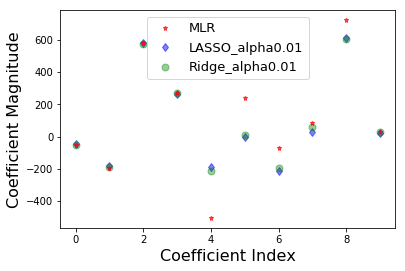

In [38]:
plt.plot(mlr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'MLR',zorder=7) 
plt.plot(lasso.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'LASSO_alpha0.01') 
plt.plot(ridge.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Ridge_alpha0.01')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='best')
plt.show()